In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from statsmodels.formula.api import ols

In [2]:
dados = pd.read_excel('C:\\Users\\User\\Desktop\\projeto Matheus\\hipoteses.xlsx',sheet_name='H1')

In [3]:
dados = dados.drop(columns=['Quantos anos você tem?', 'Eu sou uma pessoa que participa ativamente das redes sociais, seja postando, compartilhando, comentando ou “curtindo” publicações.', 'A reputação de uma marca-país influencia a minha decisão na hora de comprar um produto desenvolvido por essa nação.', 'A opinião de pessoas próximas a mim sobre uma marca-país influencia a minha decisão na hora de comprar um produto desenvolvido por essa nação.'])
dados.head()


,"As pessoas, de modo geral, ""compartilham"" as postagens das marcas-país que elas conhecem.","As pessoas, de modo geral, ""comentam"" as postagens das marcas-país que elas conhecem.","As pessoas, de modo geral, ""curtem"" as postagens das marcas-país que elas conhecem.",Os consumidores se sentem próximos de uma marca-país ao interagirem com ela nas redes sociais .,Interagir com as postagens de uma marca-país nas redes sociais faz com que os consumidores comprem mais vezes os produtos que possuem essa marca.
0,7,7,7,7,7
1,5,5,5,6,7
2,3,6,6,7,6
3,7,6,6,5,5
4,7,6,6,5,5


In [4]:
dados = dados.rename(columns={'As pessoas, de modo geral, "compartilham" as postagens das marcas-país que elas conhecem.':'Q1', 'As pessoas, de modo geral, "comentam" as postagens das marcas-país que elas conhecem.':'Q2', 'As pessoas, de modo geral, "curtem" as postagens das marcas-país que elas conhecem.':'Q3', 'Os consumidores se sentem próximos de uma marca-país ao interagirem com ela nas redes sociais .':'Q4', 'Interagir com as postagens de uma marca-país nas redes sociais faz com que os consumidores comprem mais vezes os produtos que possuem essa marca.':'Q5'})

In [5]:
dados_melt = dados[:]
dados_melt = pd.melt(dados_melt.reset_index(), id_vars=['index'], value_vars=['Q1','Q2','Q3','Q4','Q5'])

In [6]:
dados_melt.columns =['index','treatments','value']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.0% of the points

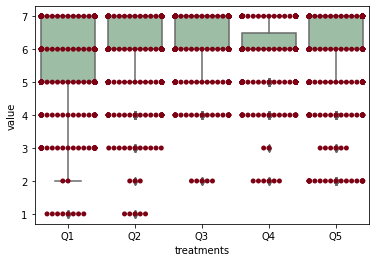

In [8]:
ax = sns.boxplot(x='treatments', y='value', data=dados_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=dados_melt, color='#7d0013')
plt.show()

In [9]:
fvalue, pvalue = stats.f_oneway(dados['Q1'], dados['Q2'], dados['Q3'],dados['Q4'],dados['Q5'])
print(fvalue, pvalue)


32.72874155996402 9.410805568232209e-27


In [12]:
import statsmodels.api as sm
model = ols('value ~ C(treatments)', data=dados_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),156.654366,4.0,32.728742,9.410806e-27
Residual,3625.733114,3030.0,NaN,NaN


In [15]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=dados_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),4.0,156.654366,39.163591,32.728742,9.410806e-27
Residual,3030.0,3625.733114,1.196612,NaN,NaN


In [16]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=dados_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Q1,Q2,0.217463,0.046081,0.388845,4.897822,0.004908
1,Q1,Q3,0.614498,0.443116,0.785879,13.840057,0.001000
2,Q1,Q4,0.232290,0.060908,0.403672,5.231764,0.002052
3,Q1,Q5,0.545305,0.373923,0.716687,12.281659,0.001000
4,Q2,Q3,0.397035,0.225653,0.568416,8.942235,0.001000
5,Q2,Q4,0.014827,-0.156555,0.186209,0.333942,0.900000
6,Q2,Q5,0.327842,0.156460,0.499224,7.383837,0.001000
7,Q3,Q4,0.382208,0.210826,0.553589,8.608293,0.001000
8,Q3,Q5,0.069193,-0.102189,0.240575,1.558398,0.779958
9,Q4,Q5,0.313015,0.141633,0.484397,7.049895,0.001000


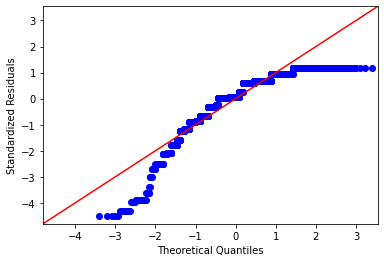

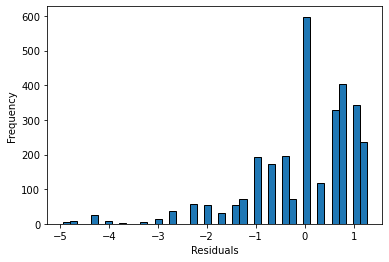

In [17]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()


plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [18]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)


0.8653911352157593 2.802596928649634e-45


In [19]:
w, pvalue = stats.bartlett(dados['Q1'], dados['Q2'], dados['Q3'],dados['Q4'],dados['Q5'])
print(w, pvalue)

175.37771331018342 7.329637332445297e-37


In [21]:
res = stat()
res.levene(df=dados_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),25.8648
1,Degrees of freedom (Df),4.0000
2,p value,0.0000
